Q5(a) Alpha NS: -0.004
Q5(a) Alpha TGT: 0.0102
Q5(b) Expected return NS: 0.007625
Q5(b) Expected return TGT: 0.00669

Q5(d) Tangency weights [Mkt, NS, TGT]: [0.7074 0.1971 0.0955]
Tangency portfolio E[R]: 0.008508 Vol: 0.043122 Sharpe: 0.1161


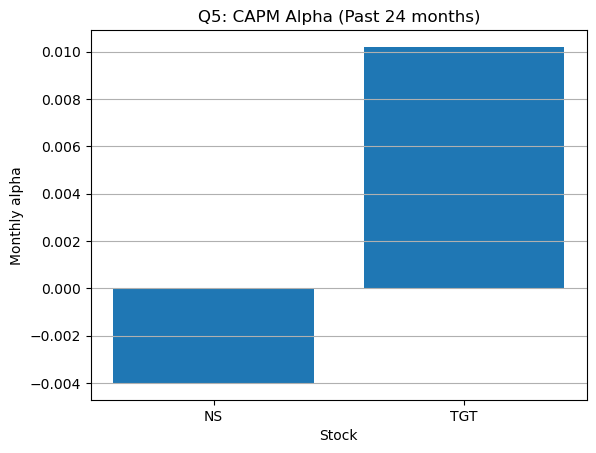

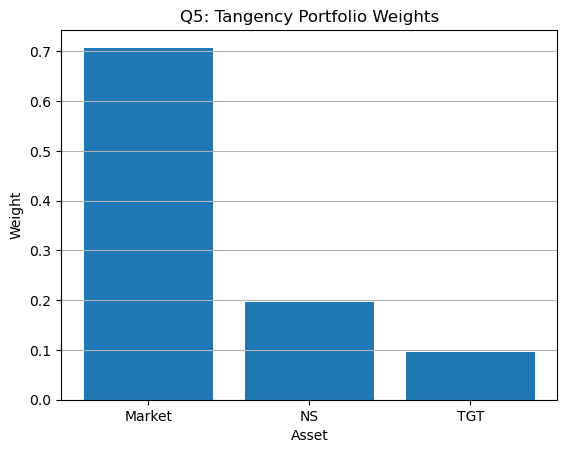

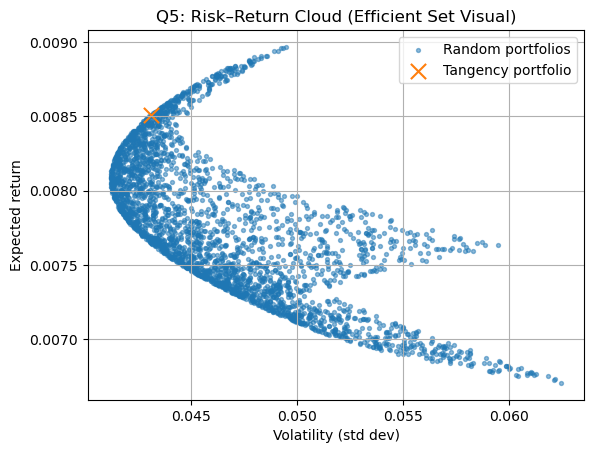

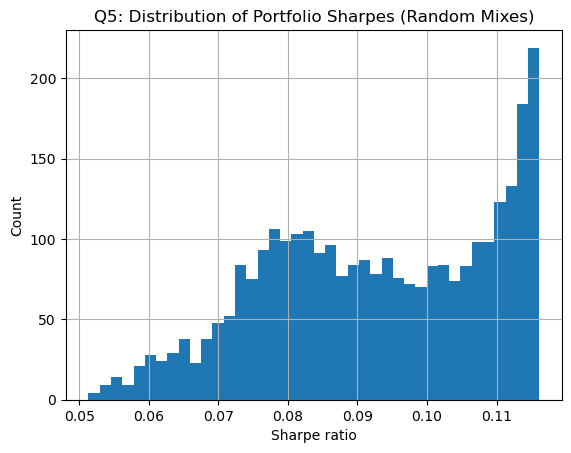

In [1]:
### Niraj Neupane

## Financial Micro Economics

# ============================================================
# Q5 — CAPM Alpha + Expected Returns + Tangency Weights (Max Sharpe) + Plots
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1) CAPM alpha and expected return
# ----------------------------
def alpha_capm(stock_rp, beta, mkt_rp):
    """alpha = (stock risk premium) - beta*(market risk premium)"""
    return stock_rp - beta * mkt_rp

def expected_return_capm(rf, beta, exp_mkt_rp):
    """E[R] = rf + beta * E[mkt_rp]"""
    return rf + beta * exp_mkt_rp

# Example inputs (REPLACE with your Q5 numbers)
rf = 0.0035          # 0.35% monthly
mkt_rp_past = 0.0100  # 1.00% monthly (past)
mkt_rp_fwd  = 0.0055  # 0.55% monthly (forward)

beta_NS = 0.75
beta_TGT = 0.58

stock_rp_NS = 0.0035     # 0.35% monthly risk premium (example)
stock_rp_TGT = 0.0160    # 1.60% monthly risk premium (example)

alpha_NS  = alpha_capm(stock_rp_NS, beta_NS, mkt_rp_past)
alpha_TGT = alpha_capm(stock_rp_TGT, beta_TGT, mkt_rp_past)

ER_NS  = expected_return_capm(rf, beta_NS,  mkt_rp_fwd)
ER_TGT = expected_return_capm(rf, beta_TGT, mkt_rp_fwd)

print("Q5(a) Alpha NS:", round(alpha_NS, 6))
print("Q5(a) Alpha TGT:", round(alpha_TGT, 6))
print("Q5(b) Expected return NS:", round(ER_NS, 6))
print("Q5(b) Expected return TGT:", round(ER_TGT, 6))

# ----------------------------
# 2) Tangency portfolio (Max Sharpe) with 3 risky assets:
#    [Market Index, Stock1, Stock2]
#    w* ∝ Σ^{-1} (μ - rf*1)
# ----------------------------
def tangency_weights(mu, cov, rf):
    mu = np.asarray(mu, dtype=float)
    cov = np.asarray(cov, dtype=float)
    ones = np.ones_like(mu)
    excess = mu - rf * ones
    inv = np.linalg.inv(cov)
    w_unnorm = inv @ excess
    w = w_unnorm / np.sum(w_unnorm)  # normalize to sum to 1
    return w

def portfolio_stats(w, mu, cov, rf):
    w = np.asarray(w, dtype=float)
    mu = np.asarray(mu, dtype=float)
    cov = np.asarray(cov, dtype=float)
    exp_ret = float(w @ mu)
    vol = float(np.sqrt(w @ cov @ w))
    sharpe = (exp_ret - rf) / vol if vol > 0 else np.nan
    return exp_ret, vol, sharpe

# Example: expected returns (monthly) and covariance matrix (monthly)
# REPLACE cov with your Q5 covariance table.
mu = np.array([rf + mkt_rp_fwd, ER_NS, ER_TGT], dtype=float)

cov = np.array([
    [0.0025, 0.0010, 0.0008],
    [0.0010, 0.0036, 0.0012],
    [0.0008, 0.0012, 0.0040],
], dtype=float)

w_star = tangency_weights(mu, cov, rf)
er_p, vol_p, sh_p = portfolio_stats(w_star, mu, cov, rf)

print("\nQ5(d) Tangency weights [Mkt, NS, TGT]:", np.round(w_star, 4))
print("Tangency portfolio E[R]:", round(er_p, 6), "Vol:", round(vol_p, 6), "Sharpe:", round(sh_p, 4))

# ----------------------------
# 3) Plots: (i) alphas (bar), (ii) efficient frontier sample, (iii) weights
# ----------------------------
plt.figure()
plt.bar(["NS", "TGT"], [alpha_NS, alpha_TGT])
plt.xlabel("Stock")
plt.ylabel("Monthly alpha")
plt.title("Q5: CAPM Alpha (Past 24 months)")
plt.grid(True, axis="y")
plt.show()

plt.figure()
plt.bar(["Market", "NS", "TGT"], w_star)
plt.xlabel("Asset")
plt.ylabel("Weight")
plt.title("Q5: Tangency Portfolio Weights")
plt.grid(True, axis="y")
plt.show()

# Efficient frontier (random portfolios for visualization)
rng = np.random.default_rng(0)
n_port = 3000
W = rng.dirichlet(np.ones(3), size=n_port)

rets = W @ mu
vols = np.sqrt(np.einsum("ij,jk,ik->i", W, cov, W))
sharpes = (rets - rf) / vols

plt.figure()
plt.scatter(vols, rets, s=8, alpha=0.5, label="Random portfolios")
plt.scatter([vol_p], [er_p], marker="x", s=120, label="Tangency portfolio")
plt.xlabel("Volatility (std dev)")
plt.ylabel("Expected return")
plt.title("Q5: Risk–Return Cloud (Efficient Set Visual)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.hist(sharpes, bins=40)
plt.xlabel("Sharpe ratio")
plt.ylabel("Count")
plt.title("Q5: Distribution of Portfolio Sharpes (Random Mixes)")
plt.grid(True)
plt.show()

# ----------------------------
# Suggestions (optional):
# - Add constraints: no shorting (w>=0), max position limits, etc. via quadratic programming
# - If question assumes forward alphas are zero, explicitly set μ = rf + beta*mkt_rp for stocks
# - Add tracking error vs market if the question compares “mostly index + small tilts”
